In [101]:
import os
import pandas as pd
import csv
import math
import numpy as np
from ipywidgets import Dropdown

In [105]:
folder_path = 'SaliencyData/Task3'

def load_data(file):
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path, delimiter=';', usecols=['GazeTime', 'Region', 'Target', 'PosX', 'PosY', 'PosZ', 'PlayerPosX', 'PlayerPosY', 'PlayerPosZ', 'LightIntensity', 'Velocity'])
    data = data[~((data['PosX'] == 0) & (data['PosY'] == 0) & (data['PosZ'] == 0))]

    if len(data) <= 1:  # The data contains only a header
        return None

    # Get the unique regions
    regions = data['Region'].unique()

    # Skip the first region
    for region in regions[1:]:
        # Get the index of the first row of the current region
        first_row_index = data[data['Region'] == region].index[0]
        # Drop the first row of the current region
        data = data.drop(first_row_index)

    # Normalize position data using Min-Max normalization
    pos_columns = ['PosX', 'PosY', 'PosZ', 'PlayerPosX', 'PlayerPosY', 'PlayerPosZ', 'LightIntensity', 'Velocity']
    for column in pos_columns:
        data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

    # Create light intensity range column
    bins = [0, 0.25, 0.5, 0.75, 1]
    labels = ['0-25%', '25-50%', '50-75%', '75-100%']
    data['IntensityRange'] = pd.cut(data['LightIntensity'], bins=bins, labels=labels, include_lowest=True)

    # Drop duplicates
    #data.drop_duplicates(inplace=True)
    data.drop_duplicates(subset=['LightIntensity'], inplace=True)

    # Reset index
    data.reset_index(drop=True, inplace=True)

    return data

dataframes = [df for df in (load_data(file) for file in os.listdir(folder_path) if file.endswith('.csv')) if df is not None]


In [112]:
def count_intensity(dataframes):
    # Concatenate all dataframes
    all_data = pd.concat(dataframes)

    # Count frequency of each light intensity range
    intensity_counts = all_data['IntensityRange'].value_counts()

    # Convert to DataFrame
    count_df = intensity_counts.reset_index()
    count_df.columns = ['IntensityRange', 'Count']

    return count_df


In [113]:
count_df = count_intensity(dataframes)


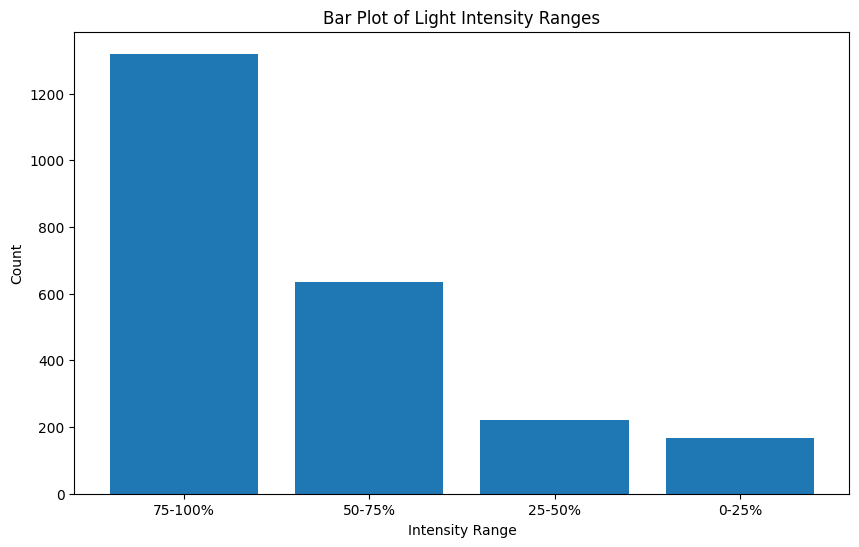

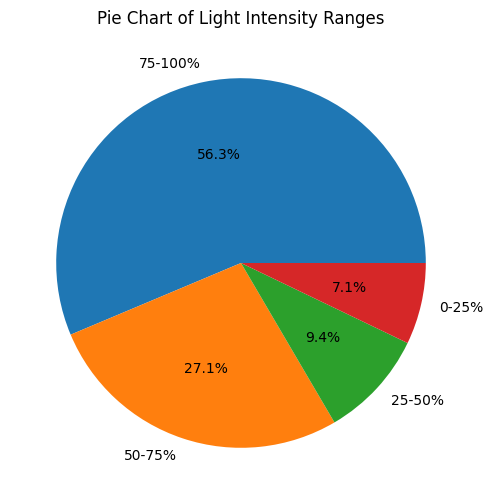

In [115]:
import matplotlib.pyplot as plt

# Bar Plot
plt.figure(figsize=(10,6))
plt.bar(count_df['IntensityRange'], count_df['Count'])
plt.xlabel('Intensity Range')
plt.ylabel('Count')
plt.title('Bar Plot of Light Intensity Ranges')
plt.show()

# Pie Chart
plt.figure(figsize=(10,6))
plt.pie(count_df['Count'], labels = count_df['IntensityRange'], autopct='%1.1f%%')
plt.title('Pie Chart of Light Intensity Ranges')
plt.show()

# Line Graph
#plt.figure(figsize=(10,6))
#plt.plot(count_df['IntensityRange'], count_df['Count'])
#plt.xlabel('Intensity Range')
#plt.ylabel('Count')
#plt.title('Line Graph of Light Intensity Ranges')
#plt.grid()
#plt.show()


In [127]:
def ConvergTime(dataframe):
    # Filter out rows where Target is 'None'
    dataframe = dataframe[dataframe['Target'] != 'None']

    # Group the data by 'IntensityRange'
    grouped_data = dataframe.groupby('IntensityRange')

    # Initialize an empty DataFrame to store the results
    results = pd.DataFrame(columns=['IntensityRange', 'ConvergenceTime'])

    # Iterate over each group ('IntensityRange')
    for intensity_range, group in grouped_data:
        # Calculate the average gaze time for the current group (intensity range)
        avg_gaze_time = group['GazeTime'].mean()

        # Append the result to the results DataFrame
        results = results.append({'IntensityRange': intensity_range, 'ConvergenceTime': avg_gaze_time}, ignore_index=True)

    return results


In [129]:
def ConvergTime(dataframe):
    # Filter out rows where Target is 'None'
    dataframe = dataframe[dataframe['Target'] != 'None']

    # Group the data by 'IntensityRange'
    grouped_data = dataframe.groupby('IntensityRange')

    # Initialize an empty DataFrame to store the results
    results = pd.DataFrame(columns=['IntensityRange', 'ConvergenceTime'])

    # Iterate over each group ('IntensityRange')
    for intensity_range, group in grouped_data:
        # Calculate the average gaze time for the current group (intensity range)
        avg_gaze_time = group['GazeTime'].mean()

        # Append the result to the results DataFrame
        results = pd.concat([results, pd.DataFrame({'IntensityRange': [intensity_range], 'ConvergenceTime': [avg_gaze_time]})], ignore_index=True)

    return results

In [133]:

# Concatenate all dataframes into one
all_data = pd.concat(dataframes)

# Calculate overall convergence time
overall_results = ConvergTime(all_data)

overall_results

,IntensityRange,ConvergenceTime
0,0-25%,0.055634
1,25-50%,0.055630
2,50-75%,0.055667
3,75-100%,0.055675
